In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load your data
pollutants = pd.read_csv('./../data/boston_pollutants_with_aqi.csv')
weather = pd.read_csv('./../data/boston-weather-data(open_meteo).csv', skiprows=3)

# Convert dates
pollutants['date'] = pd.to_datetime(pollutants['date'])
weather['date'] = pd.to_datetime(weather['time'])

# Merge the datasets
df = pd.merge(pollutants, weather, on='date', how='inner')

print(f"Dataset shape: {df.shape}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (5478, 21)
Date range: 2009-01-01 00:00:00 to 2023-12-31 00:00:00

First few rows:


,date,PM2.5,O3,CO,NO2,SO2,AQI_PM2.5,AQI_O3,AQI_CO,AQI_NO2,...,AQI,AQI_Category,num_pollutants_available,time,temperature_2m_mean (°C),precipitation_sum (mm),apparent_temperature_mean (°C),wind_gusts_10m_max (km/h),wind_speed_10m_max (km/h),wind_direction_10m_dominant (°)
0,2009-01-01,7.28,0.019987,0.202349,14.694444,2.603328,30.0,19.0,2.0,14.0,...,30.0,Good,5,2009-01-01,-13.2,0.0,-21.2,63.7,32.8,306
1,2009-01-02,14.60,0.009254,0.437982,32.287879,5.021964,56.0,9.0,5.0,30.0,...,56.0,Moderate,5,2009-01-02,-7.2,0.0,-12.5,42.8,21.5,253
2,2009-01-03,13.45,0.019351,0.327234,17.486111,3.147798,54.0,18.0,4.0,16.0,...,54.0,Moderate,5,2009-01-03,-3.9,0.0,-10.3,52.2,26.9,281
3,2009-01-04,7.54,0.014835,0.276534,20.680556,2.927000,31.0,14.0,3.0,20.0,...,31.0,Good,5,2009-01-04,-4.8,0.0,-10.7,46.1,25.9,303
4,2009-01-05,13.00,0.011638,0.445177,28.781291,3.546377,53.0,11.0,5.0,27.0,...,53.0,Moderate,5,2009-01-05,0.0,0.4,-4.6,29.5,18.0,252


AQI Statistics:
count    5478.000000
mean       34.599124
std        12.495299
min        10.000000
25%        26.000000
50%        32.000000
75%        41.000000
max       154.000000
Name: AQI, dtype: float64

Missing values: 0


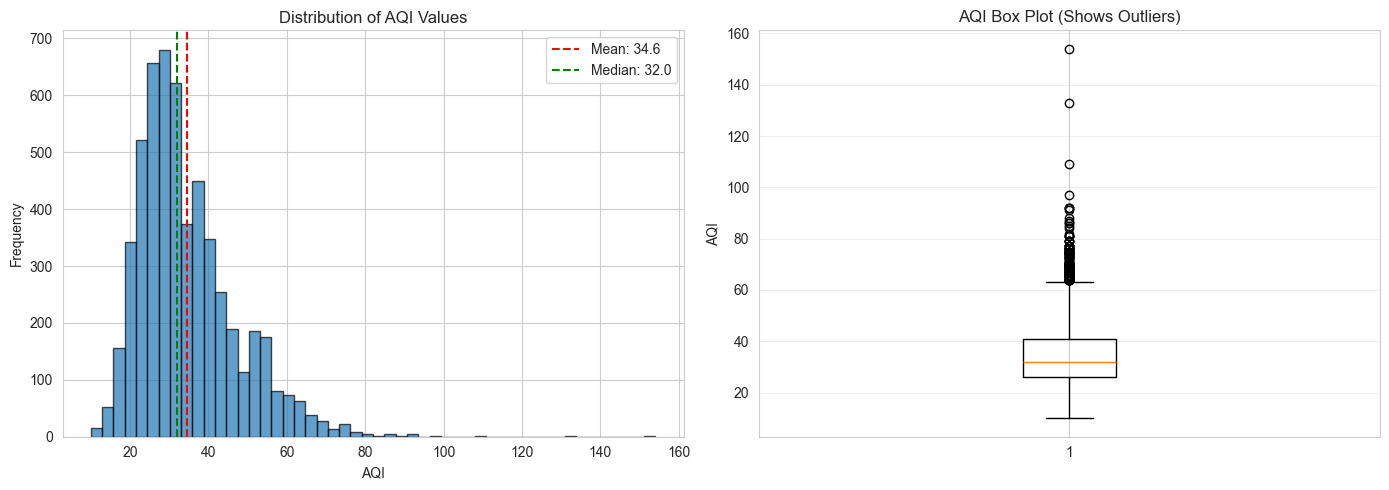


AQI Category Distribution:
AQI_Category
Good                              4772
Moderate                           703
Unhealthy                            1
Unhealthy for Sensitive Groups       2
Name: count, dtype: int64


In [23]:
# Basic statistics
print("AQI Statistics:")
print(df['AQI'].describe())
print(f"\nMissing values: {df['AQI'].isna().sum()}")

# Visualize AQI distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['AQI'], bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(df['AQI'].mean(), color='red', linestyle='--', label=f'Mean: {df["AQI"].mean():.1f}')
axes[0].axvline(df['AQI'].median(), color='green', linestyle='--', label=f'Median: {df["AQI"].median():.1f}')
axes[0].set_xlabel('AQI')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of AQI Values')
axes[0].legend()

# Box plot
axes[1].boxplot(df['AQI'], vert=True)
axes[1].set_ylabel('AQI')
axes[1].set_title('AQI Box Plot (Shows Outliers)')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Check AQI categories
print("\nAQI Category Distribution:")
print(df['AQI_Category'].value_counts().sort_index())

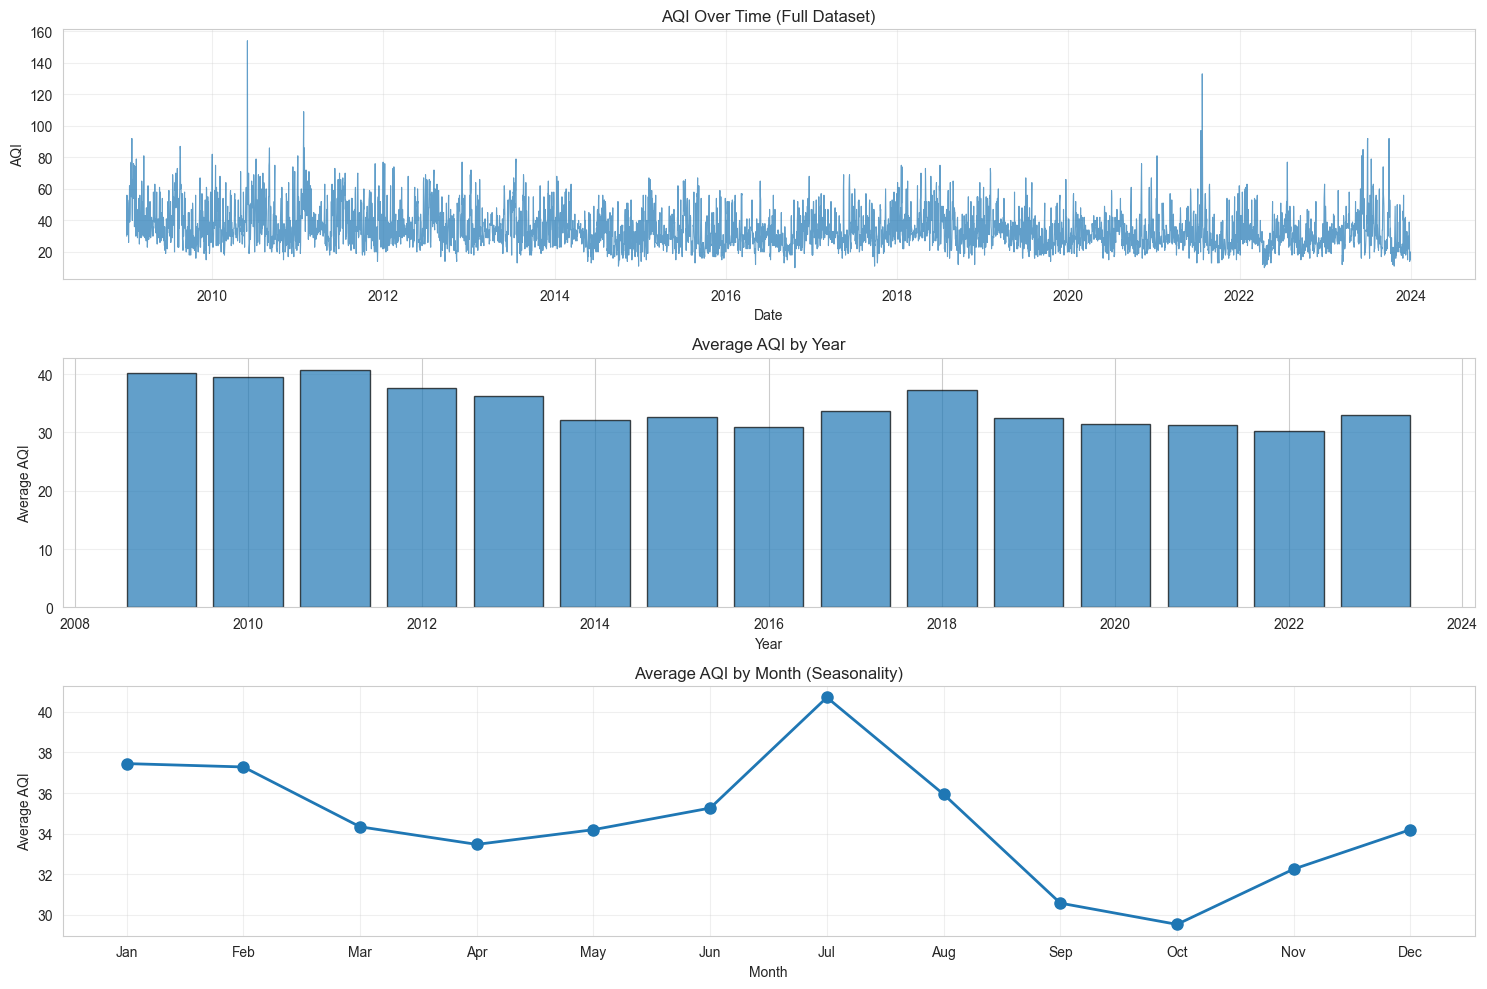

In [24]:
# Plot AQI over time
fig, axes = plt.subplots(3, 1, figsize=(15, 10))

# Full time series
axes[0].plot(df['date'], df['AQI'], alpha=0.7, linewidth=0.8)
axes[0].set_xlabel('Date')
axes[0].set_ylabel('AQI')
axes[0].set_title('AQI Over Time (Full Dataset)')
axes[0].grid(alpha=0.3)

# Yearly average
df['year'] = df['date'].dt.year
yearly_avg = df.groupby('year')['AQI'].mean()
axes[1].bar(yearly_avg.index, yearly_avg.values, alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average AQI')
axes[1].set_title('Average AQI by Year')
axes[1].grid(axis='y', alpha=0.3)

# Monthly patterns
df['month'] = df['date'].dt.month
monthly_avg = df.groupby('month')['AQI'].mean()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[2].plot(monthly_avg.index, monthly_avg.values, marker='o', linewidth=2, markersize=8)
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Average AQI')
axes[2].set_title('Average AQI by Month (Seasonality)')
axes[2].set_xticks(range(1, 13))
axes[2].set_xticklabels(month_names)
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

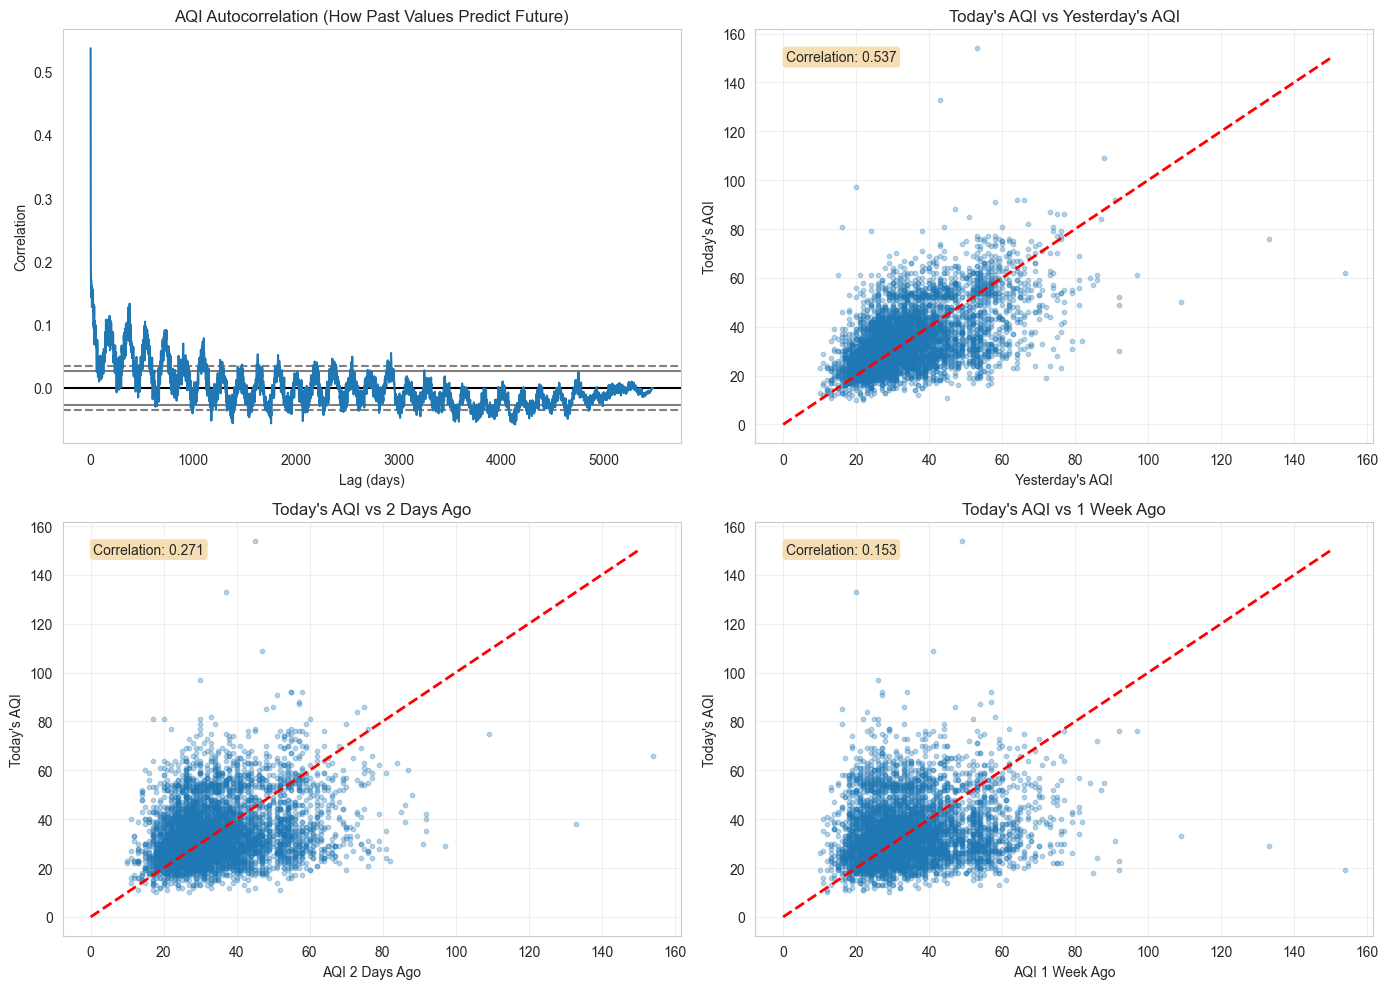

Correlation with lag 1: 0.537
Correlation with lag 2: 0.271
Correlation with lag 7: 0.153


In [25]:
from pandas.plotting import autocorrelation_plot

# Create lag features to visualize
df_sorted = df.sort_values('date').reset_index(drop=True)
df_sorted['AQI_lag_1'] = df_sorted['AQI'].shift(1)
df_sorted['AQI_lag_2'] = df_sorted['AQI'].shift(2)
df_sorted['AQI_lag_7'] = df_sorted['AQI'].shift(7)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Autocorrelation plot
autocorrelation_plot(df_sorted['AQI'].dropna(), ax=axes[0, 0])
axes[0, 0].set_title('AQI Autocorrelation (How Past Values Predict Future)')
axes[0, 0].set_xlabel('Lag (days)')
axes[0, 0].set_ylabel('Correlation')

# Scatter: Today vs Yesterday
axes[0, 1].scatter(df_sorted['AQI_lag_1'], df_sorted['AQI'], alpha=0.3, s=10)
axes[0, 1].plot([0, 150], [0, 150], 'r--', lw=2)
axes[0, 1].set_xlabel('Yesterday\'s AQI')
axes[0, 1].set_ylabel('Today\'s AQI')
axes[0, 1].set_title('Today\'s AQI vs Yesterday\'s AQI')
axes[0, 1].grid(alpha=0.3)
corr1 = df_sorted[['AQI', 'AQI_lag_1']].corr().iloc[0, 1]
axes[0, 1].text(0.05, 0.95, f'Correlation: {corr1:.3f}', transform=axes[0, 1].transAxes, 
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat'))

# Scatter: Today vs 2 Days Ago
axes[1, 0].scatter(df_sorted['AQI_lag_2'], df_sorted['AQI'], alpha=0.3, s=10)
axes[1, 0].plot([0, 150], [0, 150], 'r--', lw=2)
axes[1, 0].set_xlabel('AQI 2 Days Ago')
axes[1, 0].set_ylabel('Today\'s AQI')
axes[1, 0].set_title('Today\'s AQI vs 2 Days Ago')
axes[1, 0].grid(alpha=0.3)
corr2 = df_sorted[['AQI', 'AQI_lag_2']].corr().iloc[0, 1]
axes[1, 0].text(0.05, 0.95, f'Correlation: {corr2:.3f}', transform=axes[1, 0].transAxes,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat'))

# Scatter: Today vs 1 Week Ago
axes[1, 1].scatter(df_sorted['AQI_lag_7'], df_sorted['AQI'], alpha=0.3, s=10)
axes[1, 1].plot([0, 150], [0, 150], 'r--', lw=2)
axes[1, 1].set_xlabel('AQI 1 Week Ago')
axes[1, 1].set_ylabel('Today\'s AQI')
axes[1, 1].set_title('Today\'s AQI vs 1 Week Ago')
axes[1, 1].grid(alpha=0.3)
corr7 = df_sorted[['AQI', 'AQI_lag_7']].corr().iloc[0, 1]
axes[1, 1].text(0.05, 0.95, f'Correlation: {corr7:.3f}', transform=axes[1, 1].transAxes,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat'))

plt.tight_layout()
plt.show()

print(f"Correlation with lag 1: {corr1:.3f}")
print(f"Correlation with lag 2: {corr2:.3f}")
print(f"Correlation with lag 7: {corr7:.3f}")

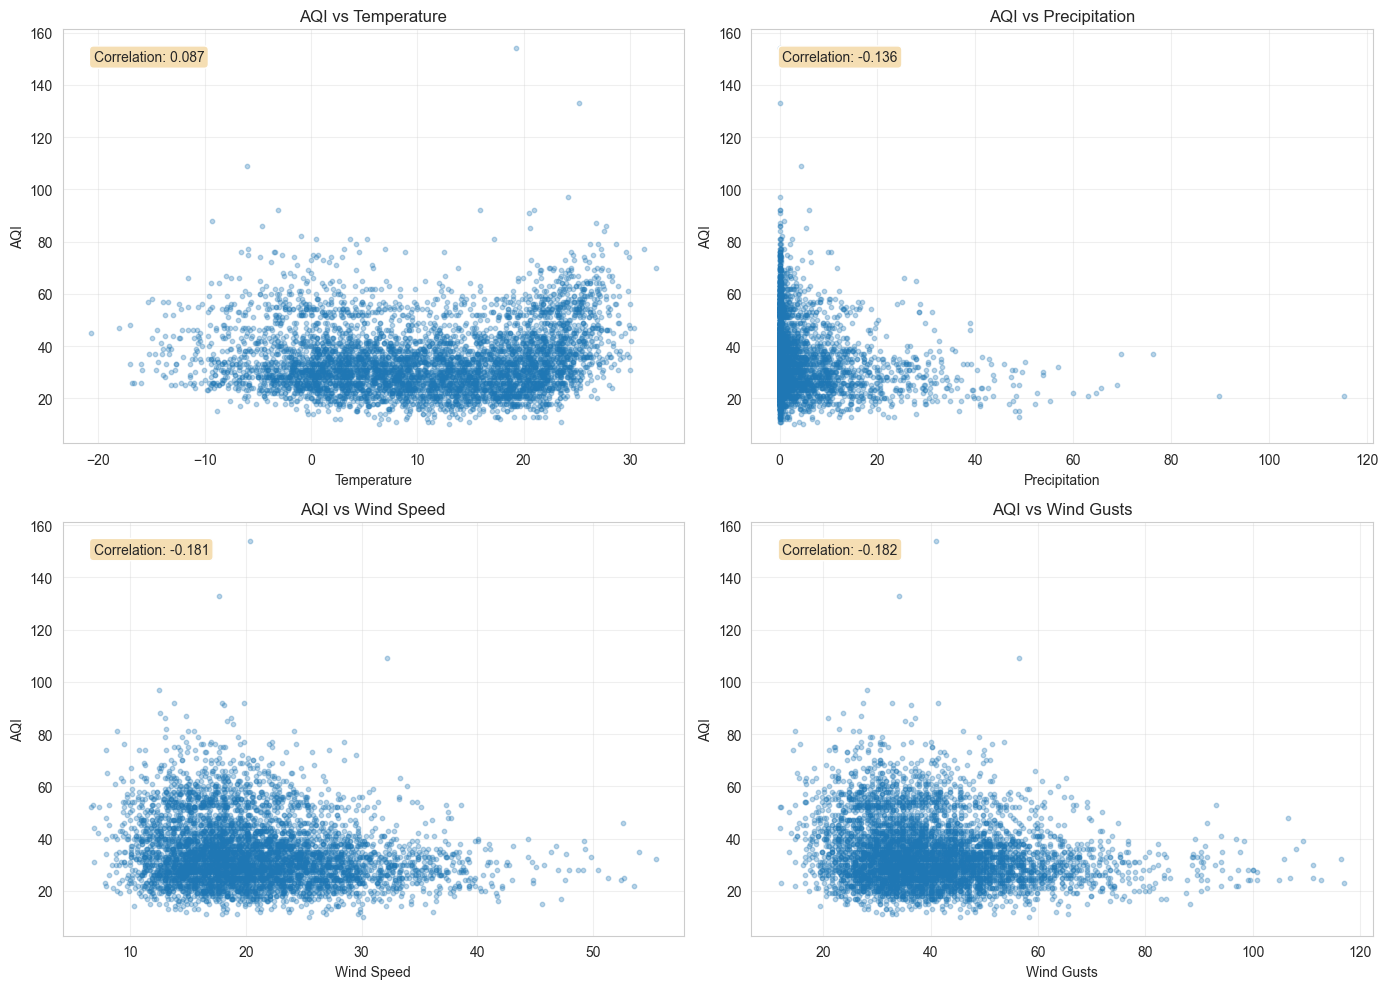

In [26]:
# Select key weather features
weather_features = ['temperature_2m_mean (°C)', 'precipitation_sum (mm)', 
                    'wind_speed_10m_max (km/h)', 'wind_gusts_10m_max (km/h)']

# Rename for easier plotting
df_plot = df.rename(columns={
    'temperature_2m_mean (°C)': 'Temperature',
    'precipitation_sum (mm)': 'Precipitation',
    'wind_speed_10m_max (km/h)': 'Wind Speed',
    'wind_gusts_10m_max (km/h)': 'Wind Gusts'
})

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

features_clean = ['Temperature', 'Precipitation', 'Wind Speed', 'Wind Gusts']

for i, feature in enumerate(features_clean):
    axes[i].scatter(df_plot[feature], df_plot['AQI'], alpha=0.3, s=10)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('AQI')
    axes[i].set_title(f'AQI vs {feature}')
    axes[i].grid(alpha=0.3)
    
    # Calculate correlation
    corr = df_plot[[feature, 'AQI']].corr().iloc[0, 1]
    axes[i].text(0.05, 0.95, f'Correlation: {corr:.3f}', 
                 transform=axes[i].transAxes, verticalalignment='top',
                 bbox=dict(boxstyle='round', facecolor='wheat'))

plt.tight_layout()
plt.show()

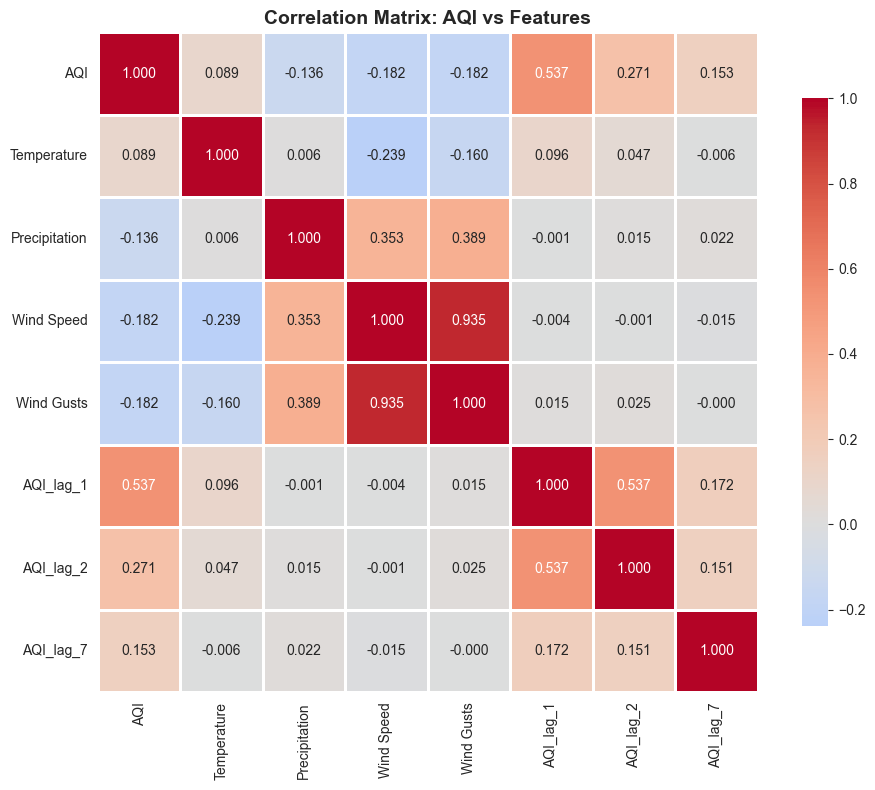


Top 5 Features Most Correlated with AQI:
AQI           1.000000
AQI_lag_1     0.537480
AQI_lag_2     0.270713
Wind Gusts    0.181719
Wind Speed    0.181623
AQI_lag_7     0.153118
Name: AQI, dtype: float64


In [27]:
# Select key columns
columns_for_corr = ['AQI', 'Temperature', 'Precipitation', 'Wind Speed', 
                     'Wind Gusts', 'AQI_lag_1', 'AQI_lag_2', 'AQI_lag_7']

# Ensure lag features exist on the dataframe we're using for plotting/correlation.
# df_plot was created earlier by renaming weather columns, so create lags on a sorted copy.
df_plot_sorted = df_plot.sort_values('date').reset_index(drop=True)
for lag in (1, 2, 7):
    col_name = f'AQI_lag_{lag}'
    # create lag column only if it doesn't already exist
    if col_name not in df_plot_sorted.columns:
        df_plot_sorted[col_name] = df_plot_sorted['AQI'].shift(lag)

# Drop rows with NA in the selected columns before computing correlations
corr_matrix = df_plot_sorted[columns_for_corr].dropna().corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix: AQI vs Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nTop 5 Features Most Correlated with AQI:")
aqi_corr = corr_matrix['AQI'].abs().sort_values(ascending=False)
print(aqi_corr.head(6))  # Top 6 (including AQI itself)

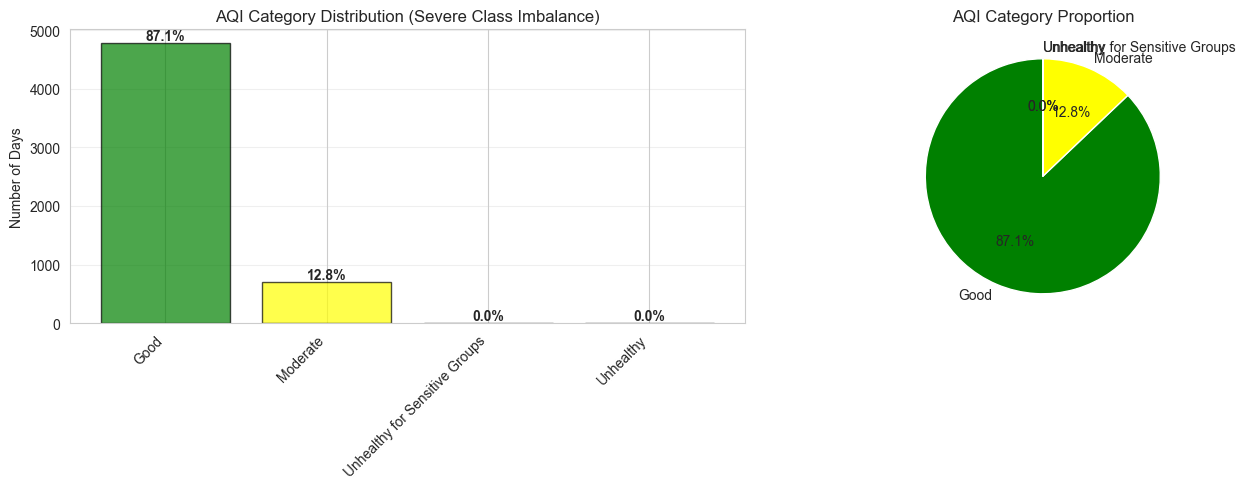


Total days: 5478
Good days: 4772 (87.1%)
Bad air days (>100 AQI): 3 (0.05%)


In [28]:
# Visualize the imbalance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
category_counts = df['AQI_Category'].value_counts()
axes[0].bar(range(len(category_counts)), category_counts.values, 
            color=['green', 'yellow', 'orange', 'red'][:len(category_counts)],
            edgecolor='black', alpha=0.7)
axes[0].set_xticks(range(len(category_counts)))
axes[0].set_xticklabels(category_counts.index, rotation=45, ha='right')
axes[0].set_ylabel('Number of Days')
axes[0].set_title('AQI Category Distribution (Severe Class Imbalance)')
axes[0].grid(axis='y', alpha=0.3)

# Add percentages on bars
for i, (cat, count) in enumerate(category_counts.items()):
    pct = 100 * count / len(df)
    axes[0].text(i, count + 50, f'{pct:.1f}%', ha='center', fontweight='bold')

# Pie chart
axes[1].pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%',
            colors=['green', 'yellow', 'orange', 'red'][:len(category_counts)],
            startangle=90)
axes[1].set_title('AQI Category Proportion')

plt.tight_layout()
plt.show()

print(f"\nTotal days: {len(df)}")
print(f"Good days: {category_counts['Good']} ({100*category_counts['Good']/len(df):.1f}%)")
print(f"Bad air days (>100 AQI): {len(df[df['AQI'] > 100])} ({100*len(df[df['AQI'] > 100])/len(df):.2f}%)")

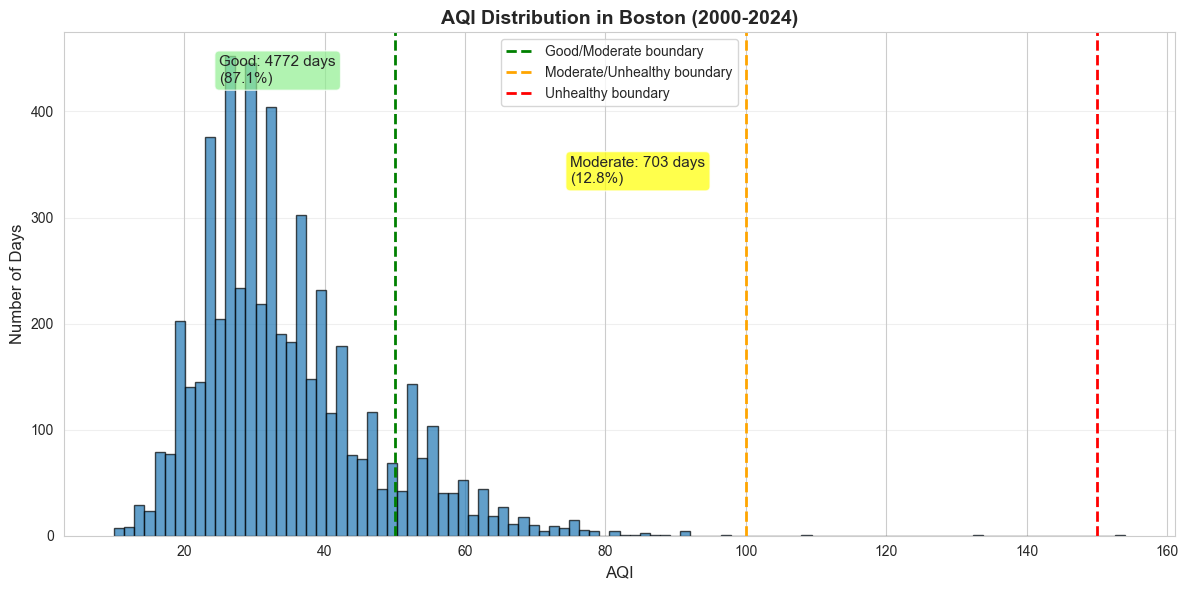

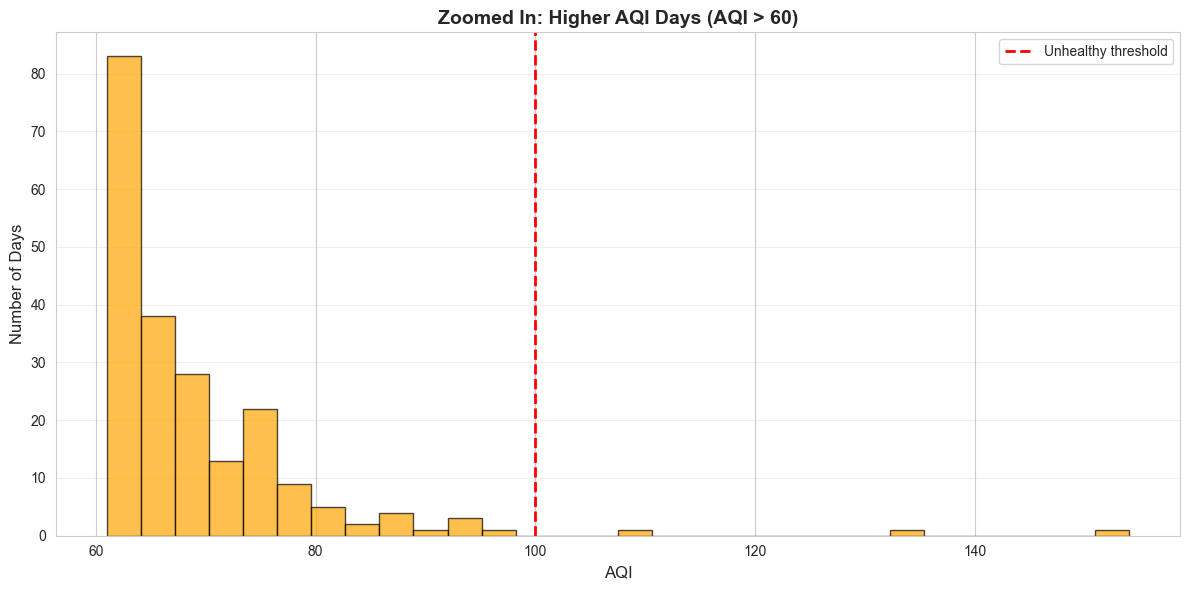

In [29]:
# Show the distribution with category boundaries
fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(df['AQI'], bins=100, edgecolor='black', alpha=0.7)
ax.axvline(50, color='green', linestyle='--', linewidth=2, label='Good/Moderate boundary')
ax.axvline(100, color='orange', linestyle='--', linewidth=2, label='Moderate/Unhealthy boundary')
ax.axvline(150, color='red', linestyle='--', linewidth=2, label='Unhealthy boundary')

ax.set_xlabel('AQI', fontsize=12)
ax.set_ylabel('Number of Days', fontsize=12)
ax.set_title('AQI Distribution in Boston (2000-2024)', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(axis='y', alpha=0.3)

# Add text annotations
ax.text(25, ax.get_ylim()[1]*0.9, f'Good: {category_counts["Good"]} days\n(87.1%)', 
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7), fontsize=11)
ax.text(75, ax.get_ylim()[1]*0.7, f'Moderate: {category_counts["Moderate"]} days\n(12.8%)', 
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7), fontsize=11)

plt.tight_layout()
plt.show()

# Zoom in on the tail
fig, ax = plt.subplots(figsize=(12, 6))
high_aqi = df[df['AQI'] > 60]
ax.hist(high_aqi['AQI'], bins=30, edgecolor='black', alpha=0.7, color='orange')
ax.axvline(100, color='red', linestyle='--', linewidth=2, label='Unhealthy threshold')
ax.set_xlabel('AQI', fontsize=12)
ax.set_ylabel('Number of Days', fontsize=12)
ax.set_title('Zoomed In: Higher AQI Days (AQI > 60)', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [30]:
import pandas as pd
import numpy as np
from datetime import datetime

# Load and prepare your data (assuming you have df already merged)
# df = merged dataframe with AQI + weather

# First, let's see what date range we have
print("="*60)
print("DATASET DATE RANGE")
print("="*60)
print(f"Earliest date: {df['date'].min()}")
print(f"Latest date: {df['date'].max()}")
print(f"Total days: {len(df)}")
print(f"Total years: {(df['date'].max() - df['date'].min()).days / 365.25:.1f}")

# Determine the split dates
latest_date = df['date'].max()
test_start = latest_date - pd.DateOffset(years=1)  # Last 1 year for testing
val_start = test_start - pd.DateOffset(years=1)    # Previous 1 year for validation

print("\n" + "="*60)
print("SPLIT STRATEGY")
print("="*60)
print(f"Training set:   {df['date'].min()} to {val_start - pd.DateOffset(days=1)}")
print(f"Validation set: {val_start} to {test_start - pd.DateOffset(days=1)}")
print(f"Test set:       {test_start} to {latest_date}")

# Create the splits
train_df = df[df['date'] < val_start].copy()
val_df = df[(df['date'] >= val_start) & (df['date'] < test_start)].copy()
test_df = df[df['date'] >= test_start].copy()

print("\n" + "="*60)
print("SPLIT SIZES")
print("="*60)
print(f"Training:   {len(train_df):4d} days ({100*len(train_df)/len(df):.1f}%)")
print(f"Validation: {len(val_df):4d} days ({100*len(val_df)/len(df):.1f}%)")
print(f"Test:       {len(test_df):4d} days ({100*len(test_df)/len(df):.1f}%)")
print(f"Total:      {len(df):4d} days")

# Verify no data leakage
assert train_df['date'].max() < val_df['date'].min(), "Data leakage: train overlaps with val!"
assert val_df['date'].max() < test_df['date'].min(), "Data leakage: val overlaps with test!"
print("\n✓ No data leakage detected - splits are chronological!")

DATASET DATE RANGE
Earliest date: 2009-01-01 00:00:00
Latest date: 2023-12-31 00:00:00
Total days: 5478
Total years: 15.0

SPLIT STRATEGY
Training set:   2009-01-01 00:00:00 to 2021-12-30 00:00:00
Validation set: 2021-12-31 00:00:00 to 2022-12-30 00:00:00
Test set:       2022-12-31 00:00:00 to 2023-12-31 00:00:00

SPLIT SIZES
Training:   4747 days (86.7%)
Validation:  365 days (6.7%)
Test:        366 days (6.7%)
Total:      5478 days

✓ No data leakage detected - splits are chronological!


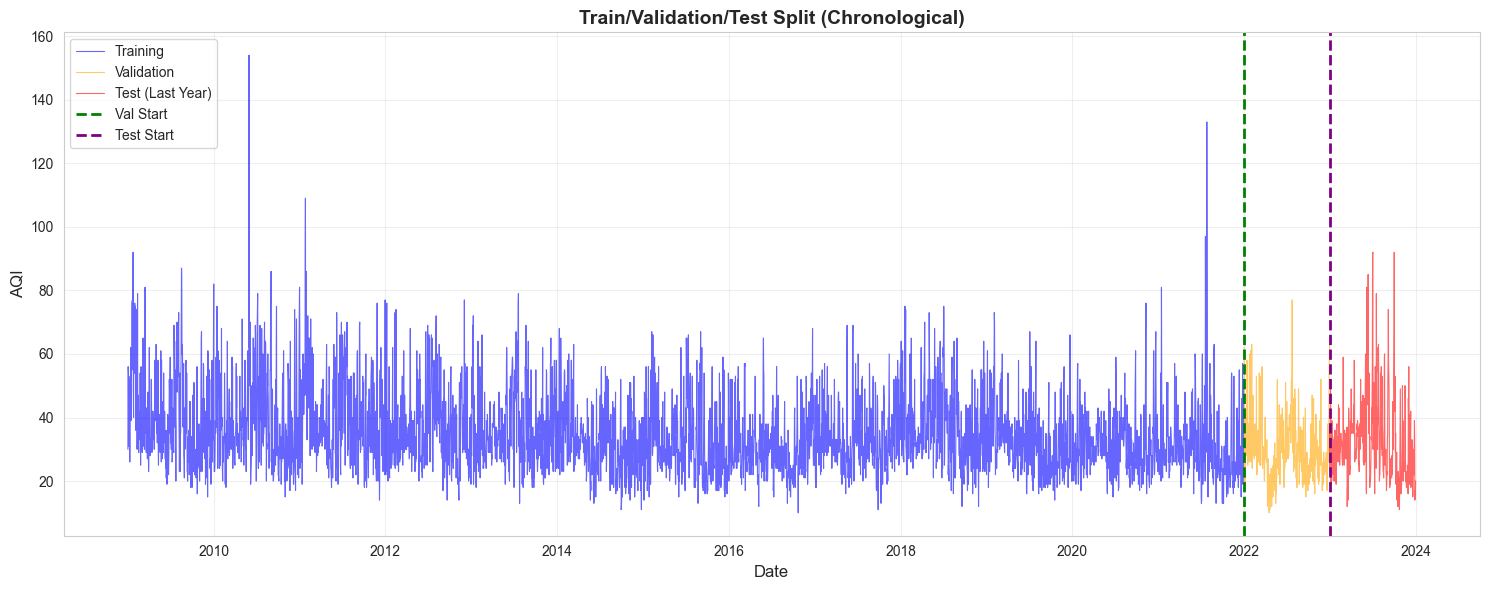

In [31]:
import matplotlib.pyplot as plt

# Create a visualization of the splits
fig, ax = plt.subplots(figsize=(15, 6))

# Plot the full timeline
ax.plot(train_df['date'], train_df['AQI'], alpha=0.6, linewidth=0.8, label='Training', color='blue')
ax.plot(val_df['date'], val_df['AQI'], alpha=0.6, linewidth=0.8, label='Validation', color='orange')
ax.plot(test_df['date'], test_df['AQI'], alpha=0.6, linewidth=0.8, label='Test (Last Year)', color='red')

# Add vertical lines to mark splits
ax.axvline(val_start, color='green', linestyle='--', linewidth=2, label='Val Start')
ax.axvline(test_start, color='purple', linestyle='--', linewidth=2, label='Test Start')

ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('AQI', fontsize=12)
ax.set_title('Train/Validation/Test Split (Chronological)', fontsize=14, fontweight='bold')
ax.legend(loc='upper left', fontsize=10)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [32]:
def create_features(df):
    """
    Create lag and rolling features for AQI prediction
    """
    df = df.copy()
    df = df.sort_values('date').reset_index(drop=True)
    
    # AQI lag features
    df['AQI_lag_1'] = df['AQI'].shift(1)
    df['AQI_lag_2'] = df['AQI'].shift(2)
    df['AQI_lag_7'] = df['AQI'].shift(7)
    
    # Rolling averages
    df['AQI_rolling_3'] = df['AQI'].rolling(window=3, min_periods=1).mean()
    df['AQI_rolling_7'] = df['AQI'].rolling(window=7, min_periods=1).mean()
    
    # Temporal features
    df['month'] = df['date'].dt.month
    df['day_of_year'] = df['date'].dt.dayofyear
    df['day_of_week'] = df['date'].dt.dayofweek
    df['season'] = df['month'].apply(lambda x: (x % 12 + 3) // 3)
    
    # Weather interactions (if columns exist)
    if 'temperature_2m_mean (°C)' in df.columns and 'wind_speed_10m_max (km/h)' in df.columns:
        df['temp_wind_interaction'] = df['temperature_2m_mean (°C)'] * df['wind_speed_10m_max (km/h)']
    
    if 'precipitation_sum (mm)' in df.columns:
        df['is_rainy'] = (df['precipitation_sum (mm)'] > 0).astype(int)
    
    return df

# Apply feature engineering to each split
train_df = create_features(train_df)
val_df = create_features(val_df)
test_df = create_features(test_df)

# Drop NaN rows created by lag features
train_df = train_df.dropna()
val_df = val_df.dropna()
test_df = test_df.dropna()

print("\n" + "="*60)
print("AFTER FEATURE ENGINEERING")
print("="*60)
print(f"Training:   {len(train_df):4d} days")
print(f"Validation: {len(val_df):4d} days")
print(f"Test:       {len(test_df):4d} days")


AFTER FEATURE ENGINEERING
Training:   4569 days
Validation:  252 days
Test:        327 days


In [33]:
# Define your feature columns
feature_cols = [
    # Weather features
    'temperature_2m_mean (°C)',
    'precipitation_sum (mm)',
    'wind_speed_10m_max (km/h)',
    'wind_gusts_10m_max (km/h)',
    
    # AQI lags
    'AQI_lag_1',
    'AQI_lag_2',
    'AQI_lag_7',
    'AQI_rolling_3',
    'AQI_rolling_7',
    
    # Temporal
    'month',
    'day_of_year',
    'day_of_week',
    'season',
    
    # Interactions
    'temp_wind_interaction',
    'is_rainy'
]

# Filter to only existing columns
feature_cols = [col for col in feature_cols if col in train_df.columns]

print("\n" + "="*60)
print("FEATURES USED")
print("="*60)
print(f"Total features: {len(feature_cols)}")
for i, col in enumerate(feature_cols, 1):
    print(f"{i:2d}. {col}")

# Create X and y for each split
X_train = train_df[feature_cols]
y_train = train_df['AQI']

X_val = val_df[feature_cols]
y_val = val_df['AQI']

X_test = test_df[feature_cols]
y_test = test_df['AQI']

print("\n" + "="*60)
print("FINAL SHAPES")
print("="*60)
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_val:   {X_val.shape}")
print(f"y_val:   {y_val.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_test:  {y_test.shape}")


FEATURES USED
Total features: 15
 1. temperature_2m_mean (°C)
 2. precipitation_sum (mm)
 3. wind_speed_10m_max (km/h)
 4. wind_gusts_10m_max (km/h)
 5. AQI_lag_1
 6. AQI_lag_2
 7. AQI_lag_7
 8. AQI_rolling_3
 9. AQI_rolling_7
10. month
11. day_of_year
12. day_of_week
13. season
14. temp_wind_interaction
15. is_rainy

FINAL SHAPES
X_train: (4569, 15)
y_train: (4569,)
X_val:   (252, 15)
y_val:   (252,)
X_test:  (327, 15)
y_test:  (327,)


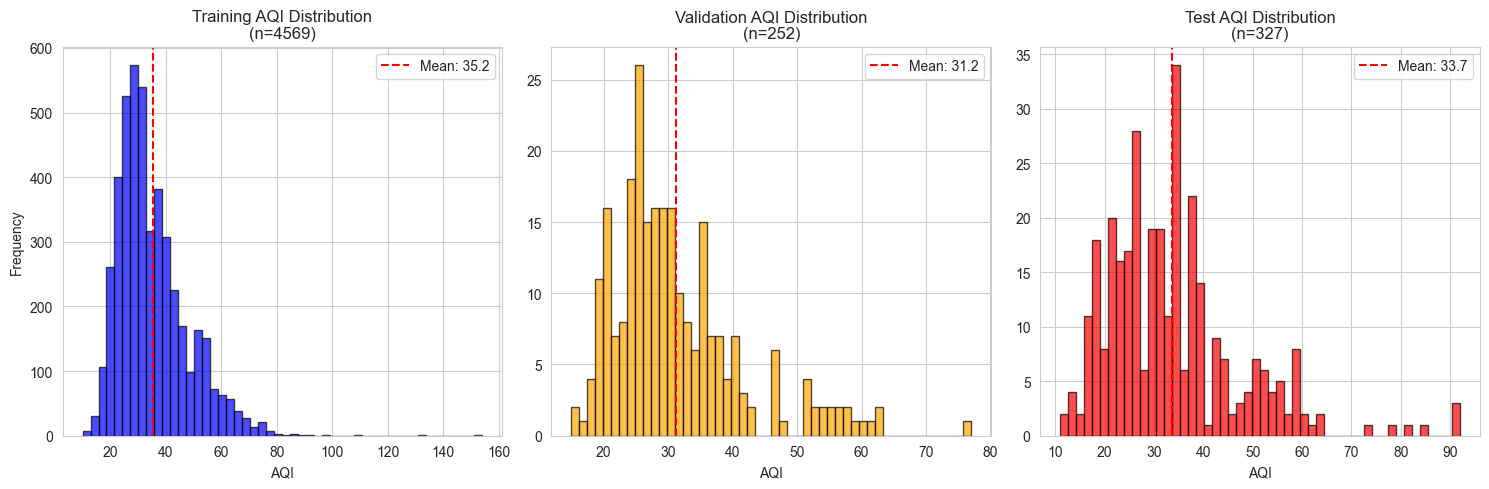


AQI STATISTICS BY SPLIT
                    Mean      Std      Min      Max
------------------------------------------------------------
Training           35.25    12.51    10.00   154.00
Validation         31.19    10.26    15.00    77.00
Test               33.69    13.73    11.00    92.00


In [35]:
# Check AQI distribution across splits
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(y_train, bins=50, alpha=0.7, edgecolor='black', color='blue')
axes[0].set_title(f'Training AQI Distribution\n(n={len(y_train)})')
axes[0].set_xlabel('AQI')
axes[0].set_ylabel('Frequency')
axes[0].axvline(y_train.mean(), color='red', linestyle='--', label=f'Mean: {y_train.mean():.1f}')
axes[0].legend()

axes[1].hist(y_val, bins=50, alpha=0.7, edgecolor='black', color='orange')
axes[1].set_title(f'Validation AQI Distribution\n(n={len(y_val)})')
axes[1].set_xlabel('AQI')
axes[1].axvline(y_val.mean(), color='red', linestyle='--', label=f'Mean: {y_val.mean():.1f}')
axes[1].legend()

axes[2].hist(y_test, bins=50, alpha=0.7, edgecolor='black', color='red')
axes[2].set_title(f'Test AQI Distribution\n(n={len(y_test)})')
axes[2].set_xlabel('AQI')
axes[2].axvline(y_test.mean(), color='red', linestyle='--', label=f'Mean: {y_test.mean():.1f}')
axes[2].legend()

plt.tight_layout()
plt.show()

# Compare statistics
print("\n" + "="*60)
print("AQI STATISTICS BY SPLIT")
print("="*60)
print(f"{'':15s} {'Mean':>8s} {'Std':>8s} {'Min':>8s} {'Max':>8s}")
print("-" * 60)
print(f"{'Training':15s} {y_train.mean():8.2f} {y_train.std():8.2f} {y_train.min():8.2f} {y_train.max():8.2f}")
print(f"{'Validation':15s} {y_val.mean():8.2f} {y_val.std():8.2f} {y_val.min():8.2f} {y_val.max():8.2f}")
print(f"{'Test':15s} {y_test.mean():8.2f} {y_test.std():8.2f} {y_test.min():8.2f} {y_test.max():8.2f}")

In [36]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming you have X_train, y_train, X_val, y_val, X_test, y_test from previous step

print("="*60)
print("STARTING MODEL TRAINING")
print("="*60)

STARTING MODEL TRAINING


In [37]:
# Baseline 1: Always predict the mean
baseline_mean = y_train.mean()
baseline_predictions = np.full(len(y_val), baseline_mean)

baseline_rmse = np.sqrt(mean_squared_error(y_val, baseline_predictions))
baseline_r2 = r2_score(y_val, baseline_predictions)

print("\n" + "="*60)
print("BASELINE MODEL (Predict Mean AQI)")
print("="*60)
print(f"Always predicts: {baseline_mean:.2f}")
print(f"Validation RMSE: {baseline_rmse:.2f}")
print(f"Validation R²:   {baseline_r2:.4f}")

# Baseline 2: Use yesterday's AQI (persistence model)
if 'AQI_lag_1' in X_val.columns:
    persistence_predictions = X_val['AQI_lag_1'].values
    persistence_rmse = np.sqrt(mean_squared_error(y_val, persistence_predictions))
    persistence_r2 = r2_score(y_val, persistence_predictions)
    
    print("\n" + "="*60)
    print("BASELINE MODEL (Yesterday's AQI)")
    print("="*60)
    print(f"Validation RMSE: {persistence_rmse:.2f}")
    print(f"Validation R²:   {persistence_r2:.4f}")
    print("\n→ Your ML model must beat this!")


BASELINE MODEL (Predict Mean AQI)
Always predicts: 35.25
Validation RMSE: 11.01
Validation R²:   -0.1570

BASELINE MODEL (Yesterday's AQI)
Validation RMSE: 9.58
Validation R²:   0.1254

→ Your ML model must beat this!


In [38]:
print("\n" + "="*60)
print("MODEL 1: RANDOM FOREST")
print("="*60)

# Initialize Random Forest
rf = RandomForestRegressor(
    n_estimators=200,      # Number of trees
    max_depth=10,          # Maximum depth of each tree
    min_samples_split=5,   # Minimum samples to split a node
    min_samples_leaf=2,    # Minimum samples in a leaf
    random_state=42,       # For reproducibility
    n_jobs=-1,             # Use all CPU cores
    verbose=1              # Show progress
)

# Train
print("\nTraining Random Forest...")
rf.fit(X_train, y_train)
print("✓ Training complete!")

# Predict on validation set
y_val_pred_rf = rf.predict(X_val)

# Evaluate
rf_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred_rf))
rf_mae = mean_absolute_error(y_val, y_val_pred_rf)
rf_r2 = r2_score(y_val, y_val_pred_rf)

print("\n" + "-"*60)
print("VALIDATION PERFORMANCE")
print("-"*60)
print(f"RMSE: {rf_rmse:.2f}")
print(f"MAE:  {rf_mae:.2f}")
print(f"R²:   {rf_r2:.4f}")

# Also check training performance (to detect overfitting)
y_train_pred_rf = rf.predict(X_train)
rf_train_r2 = r2_score(y_train, y_train_pred_rf)
print(f"\nTraining R²: {rf_train_r2:.4f}")
print(f"Validation R²: {rf_r2:.4f}")
print(f"Gap: {rf_train_r2 - rf_r2:.4f} {'(overfitting!)' if rf_train_r2 - rf_r2 > 0.1 else '(good!)'}")


MODEL 1: RANDOM FOREST

Training Random Forest...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    0.1s


✓ Training complete!

------------------------------------------------------------
VALIDATION PERFORMANCE
------------------------------------------------------------
RMSE: 1.90
MAE:  1.34
R²:   0.9654

Training R²: 0.9827
Validation R²: 0.9654
Gap: 0.0173 (good!)


[Parallel(n_jobs=-1)]: Done 172 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=14)]: Using backend ThreadingBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done 172 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=14)]: Using backend ThreadingBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  22 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done 172 tasks      | elapsed:    0.0s
[Parallel(n_jobs=14)]: Done 200 out of 200 | elapsed:    0.0s finished


In [39]:
print("\n" + "="*60)
print("MODEL 2: GRADIENT BOOSTING")
print("="*60)

# Initialize Gradient Boosting
gb = GradientBoostingRegressor(
    n_estimators=300,      # Number of boosting stages
    max_depth=5,           # Maximum depth of trees
    learning_rate=0.05,    # Shrinks contribution of each tree
    subsample=0.8,         # Fraction of samples for each tree
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    verbose=1              # Show progress
)

# Train
print("\nTraining Gradient Boosting...")
gb.fit(X_train, y_train)
print("✓ Training complete!")

# Predict on validation set
y_val_pred_gb = gb.predict(X_val)

# Evaluate
gb_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred_gb))
gb_mae = mean_absolute_error(y_val, y_val_pred_gb)
gb_r2 = r2_score(y_val, y_val_pred_gb)

print("\n" + "-"*60)
print("VALIDATION PERFORMANCE")
print("-"*60)
print(f"RMSE: {gb_rmse:.2f}")
print(f"MAE:  {gb_mae:.2f}")
print(f"R²:   {gb_r2:.4f}")

# Check training performance
y_train_pred_gb = gb.predict(X_train)
gb_train_r2 = r2_score(y_train, y_train_pred_gb)
print(f"\nTraining R²: {gb_train_r2:.4f}")
print(f"Validation R²: {gb_r2:.4f}")
print(f"Gap: {gb_train_r2 - gb_r2:.4f} {'(overfitting!)' if gb_train_r2 - gb_r2 > 0.1 else '(good!)'}")


MODEL 2: GRADIENT BOOSTING

Training Gradient Boosting...
      Iter       Train Loss      OOB Improve   Remaining Time 
         1         145.2495          11.0386           10.65s
         2         134.2593           8.7550            6.90s
         3         126.7798          18.4224            5.59s
         4         116.6400           3.6693            4.89s
         5         106.9658           1.4318            4.43s
         6          98.2593           2.0076            4.11s
         7          95.9189          24.8632            3.87s
         8          85.8901          -9.2532            3.69s
         9          78.9210           0.0608            3.55s
        10          77.4180          20.0925            3.43s
        20          42.0894           4.5854            2.86s
        30          25.5901           1.9967            2.62s
        40          16.2612          -1.0581            2.44s
        50          11.5867          -0.3645            2.32s
        60

In [40]:
print("\n" + "="*60)
print("MODEL COMPARISON (Validation Set)")
print("="*60)

results = pd.DataFrame({
    'Model': ['Baseline (Mean)', 'Baseline (Persistence)', 'Random Forest', 'Gradient Boosting'],
    'RMSE': [baseline_rmse, persistence_rmse, rf_rmse, gb_rmse],
    'MAE': [baseline_rmse, persistence_rmse, rf_mae, gb_mae],
    'R²': [baseline_r2, persistence_r2, rf_r2, gb_r2]
})

print(results.to_string(index=False))

# Determine best model
best_model_name = results.loc[results['R²'].idxmax(), 'Model']
print(f"\n🏆 Best Model: {best_model_name}")

# Select best model for final evaluation
if gb_r2 > rf_r2:
    best_model = gb
    best_predictions_val = y_val_pred_gb
    print("→ Using Gradient Boosting for final test evaluation")
else:
    best_model = rf
    best_predictions_val = y_val_pred_rf
    print("→ Using Random Forest for final test evaluation")


MODEL COMPARISON (Validation Set)
                 Model      RMSE       MAE        R²
       Baseline (Mean) 11.013468 11.013468 -0.157004
Baseline (Persistence)  9.575514  9.575514  0.125397
         Random Forest  1.903207  1.338280  0.965449
     Gradient Boosting  1.030023  0.699114  0.989880

🏆 Best Model: Gradient Boosting
→ Using Gradient Boosting for final test evaluation



✓ Saved validation plots to 'validation_performance.png'


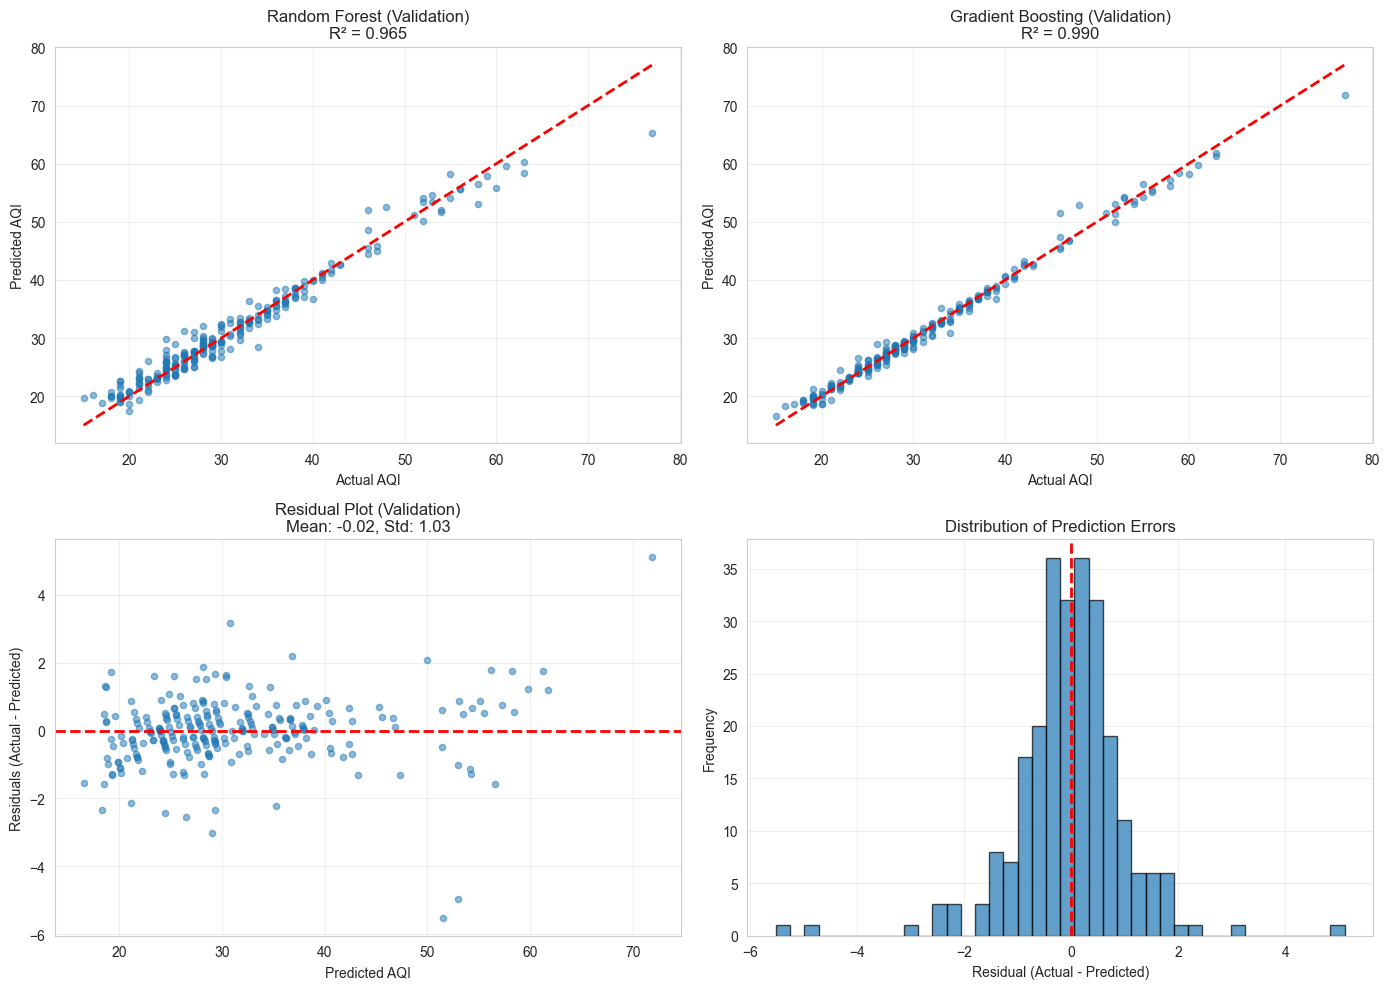

In [41]:
# Create validation visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Predicted vs Actual (Random Forest)
axes[0, 0].scatter(y_val, y_val_pred_rf, alpha=0.5, s=20)
axes[0, 0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual AQI')
axes[0, 0].set_ylabel('Predicted AQI')
axes[0, 0].set_title(f'Random Forest (Validation)\nR² = {rf_r2:.3f}')
axes[0, 0].grid(alpha=0.3)

# Plot 2: Predicted vs Actual (Gradient Boosting)
axes[0, 1].scatter(y_val, y_val_pred_gb, alpha=0.5, s=20)
axes[0, 1].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual AQI')
axes[0, 1].set_ylabel('Predicted AQI')
axes[0, 1].set_title(f'Gradient Boosting (Validation)\nR² = {gb_r2:.3f}')
axes[0, 1].grid(alpha=0.3)

# Plot 3: Residuals (Gradient Boosting)
residuals_val = y_val - y_val_pred_gb
axes[1, 0].scatter(y_val_pred_gb, residuals_val, alpha=0.5, s=20)
axes[1, 0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 0].set_xlabel('Predicted AQI')
axes[1, 0].set_ylabel('Residuals (Actual - Predicted)')
axes[1, 0].set_title(f'Residual Plot (Validation)\nMean: {residuals_val.mean():.2f}, Std: {residuals_val.std():.2f}')
axes[1, 0].grid(alpha=0.3)

# Plot 4: Error Distribution
axes[1, 1].hist(residuals_val, bins=40, edgecolor='black', alpha=0.7)
axes[1, 1].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1, 1].set_xlabel('Residual (Actual - Predicted)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Prediction Errors')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('validation_performance.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved validation plots to 'validation_performance.png'")
plt.show()


FEATURE IMPORTANCE (Gradient Boosting)
                  feature  importance
            AQI_rolling_3    0.660850
                AQI_lag_2    0.203126
                AQI_lag_1    0.121257
wind_speed_10m_max (km/h)    0.004018
            AQI_rolling_7    0.003051
wind_gusts_10m_max (km/h)    0.002593
 temperature_2m_mean (°C)    0.001696
    temp_wind_interaction    0.001098
   precipitation_sum (mm)    0.000845
              day_of_year    0.000672
                AQI_lag_7    0.000497
                   season    0.000121
              day_of_week    0.000092
                    month    0.000074
                 is_rainy    0.000010

✓ Saved feature importance plot to 'feature_importance.png'


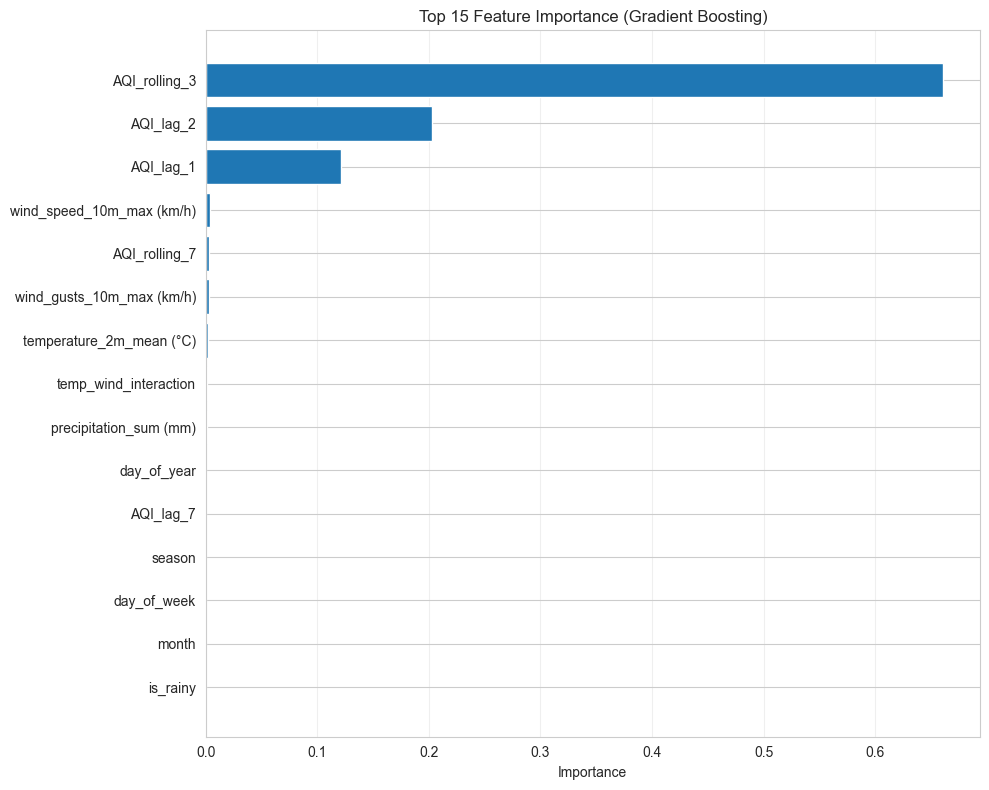


KEY INSIGHTS
Top 5 features account for 99.2% of importance:
  AQI_rolling_3                   66.1%
  AQI_lag_2                       20.3%
  AQI_lag_1                       12.1%
  wind_speed_10m_max (km/h)        0.4%
  AQI_rolling_7                    0.3%


In [42]:
# Feature importance from the best model (Gradient Boosting)
print("\n" + "="*60)
print("FEATURE IMPORTANCE (Gradient Boosting)")
print("="*60)

feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': gb.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance.to_string(index=False))

# Visualize top 15 features
plt.figure(figsize=(10, 8))
top_n = min(15, len(feature_importance))
top_features = feature_importance.head(top_n)

plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance')
plt.title(f'Top {top_n} Feature Importance (Gradient Boosting)')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved feature importance plot to 'feature_importance.png'")
plt.show()

# Key insights
print("\n" + "="*60)
print("KEY INSIGHTS")
print("="*60)
top_5 = feature_importance.head(5)
total_top5_importance = top_5['importance'].sum()
print(f"Top 5 features account for {100*total_top5_importance:.1f}% of importance:")
for i, row in top_5.iterrows():
    print(f"  {row['feature']:30s} {100*row['importance']:5.1f}%")

In [43]:
print("\n" + "="*60)
print("FINAL TEST SET EVALUATION")
print("="*60)
print("⚠️  This is the FINAL evaluation on unseen data (last year)")
print("="*60)

# Predict on test set using the best model
y_test_pred = best_model.predict(X_test)

# Calculate metrics
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\n" + "-"*60)
print("TEST SET PERFORMANCE")
print("-"*60)
print(f"RMSE: {test_rmse:.2f}")
print(f"MAE:  {test_mae:.2f}")
print(f"R²:   {test_r2:.4f}")

# Compare with validation
print("\n" + "-"*60)
print("VALIDATION vs TEST COMPARISON")
print("-"*60)
print(f"{'Metric':10s} {'Validation':>12s} {'Test':>12s} {'Difference':>12s}")
print("-"*60)
print(f"{'RMSE':10s} {gb_rmse:12.2f} {test_rmse:12.2f} {test_rmse - gb_rmse:+12.2f}")
print(f"{'MAE':10s} {gb_mae:12.2f} {test_mae:12.2f} {test_mae - gb_mae:+12.2f}")
print(f"{'R²':10s} {gb_r2:12.4f} {test_r2:12.4f} {test_r2 - gb_r2:+12.4f}")

if abs(test_r2 - gb_r2) < 0.05:
    print("\n✓ Model generalizes well! Test performance is similar to validation.")
else:
    print("\n⚠️  Warning: Significant difference between validation and test performance.")


FINAL TEST SET EVALUATION
⚠️  This is the FINAL evaluation on unseen data (last year)

------------------------------------------------------------
TEST SET PERFORMANCE
------------------------------------------------------------
RMSE: 2.08
MAE:  1.05
R²:   0.9770

------------------------------------------------------------
VALIDATION vs TEST COMPARISON
------------------------------------------------------------
Metric       Validation         Test   Difference
------------------------------------------------------------
RMSE               1.03         2.08        +1.05
MAE                0.70         1.05        +0.35
R²               0.9899       0.9770      -0.0129

✓ Model generalizes well! Test performance is similar to validation.



✓ Saved test set analysis to 'test_set_performance.png'


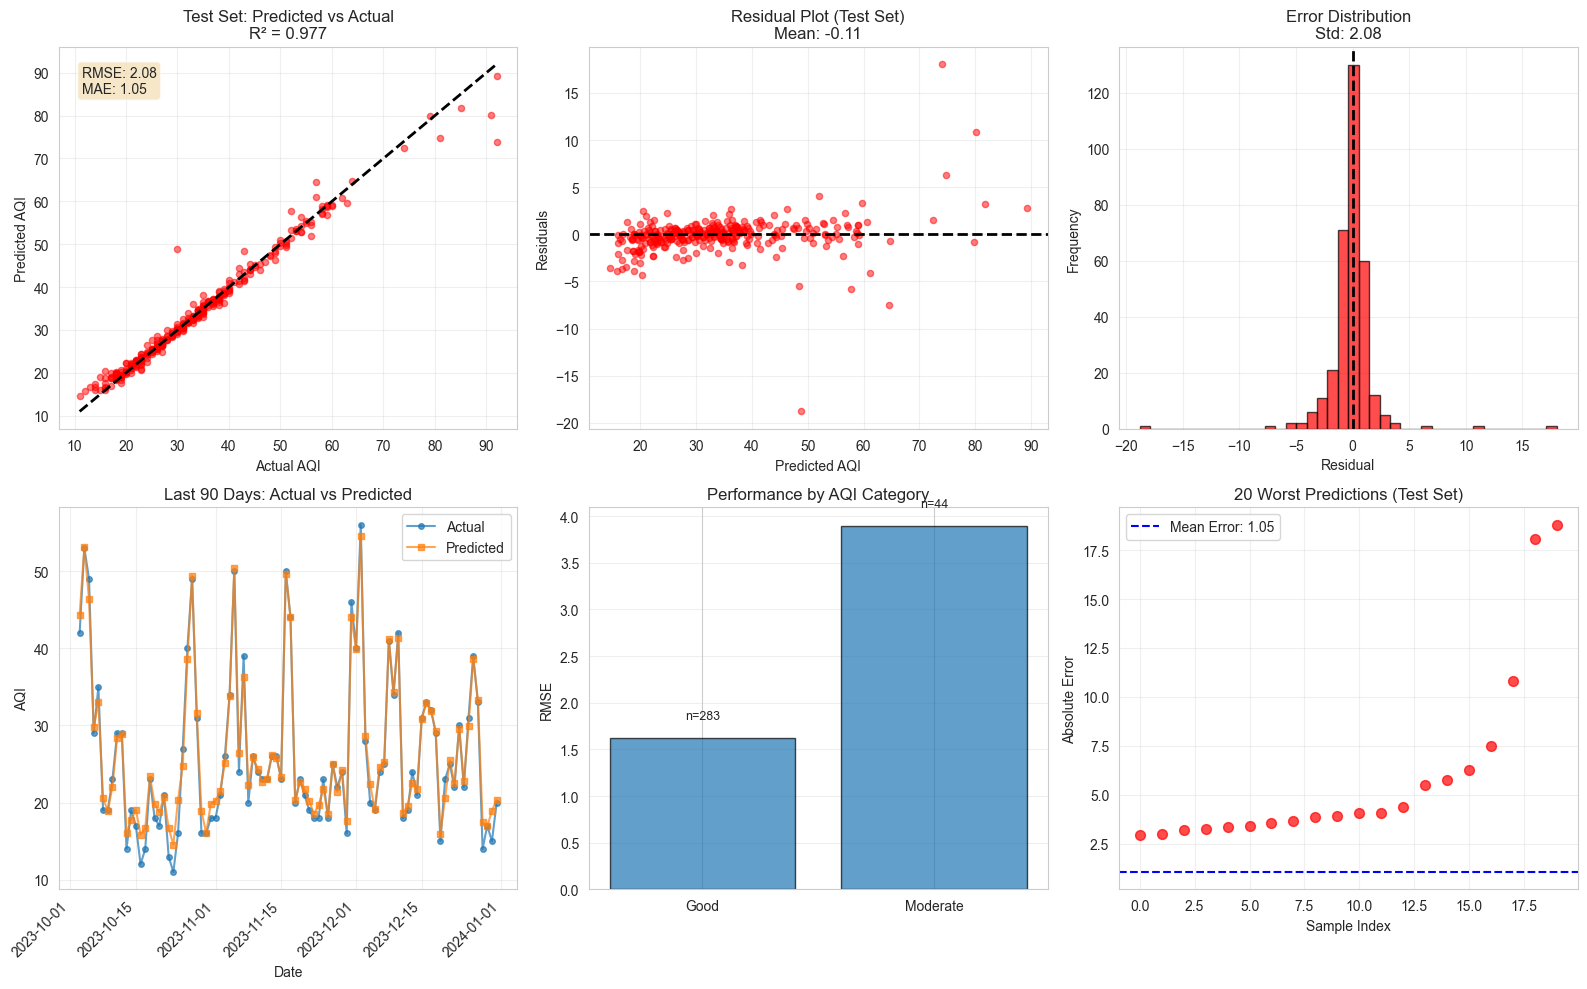


5 WORST PREDICTIONS ON TEST SET
Date: 2023-06-06    Actual:  81.0  Predicted:  74.8  Error:   +6.2
Date: 2023-09-07    Actual:  57.0  Predicted:  64.5  Error:   -7.5
Date: 2023-07-01    Actual:  91.0  Predicted:  80.2  Error:  +10.8
Date: 2023-07-02    Actual:  92.0  Predicted:  74.0  Error:  +18.0
Date: 2023-07-03    Actual:  30.0  Predicted:  48.8  Error:  -18.8


In [44]:
# Create comprehensive test set analysis
fig = plt.figure(figsize=(16, 10))

# 1. Predicted vs Actual
ax1 = plt.subplot(2, 3, 1)
ax1.scatter(y_test, y_test_pred, alpha=0.5, s=20, color='red')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_xlabel('Actual AQI')
ax1.set_ylabel('Predicted AQI')
ax1.set_title(f'Test Set: Predicted vs Actual\nR² = {test_r2:.3f}')
ax1.grid(alpha=0.3)
ax1.text(0.05, 0.95, f'RMSE: {test_rmse:.2f}\nMAE: {test_mae:.2f}',
         transform=ax1.transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

# 2. Residuals
ax2 = plt.subplot(2, 3, 2)
residuals_test = y_test - y_test_pred
ax2.scatter(y_test_pred, residuals_test, alpha=0.5, s=20, color='red')
ax2.axhline(y=0, color='k', linestyle='--', lw=2)
ax2.set_xlabel('Predicted AQI')
ax2.set_ylabel('Residuals')
ax2.set_title(f'Residual Plot (Test Set)\nMean: {residuals_test.mean():.2f}')
ax2.grid(alpha=0.3)

# 3. Error Distribution
ax3 = plt.subplot(2, 3, 3)
ax3.hist(residuals_test, bins=40, edgecolor='black', alpha=0.7, color='red')
ax3.axvline(x=0, color='k', linestyle='--', lw=2)
ax3.set_xlabel('Residual')
ax3.set_ylabel('Frequency')
ax3.set_title(f'Error Distribution\nStd: {residuals_test.std():.2f}')
ax3.grid(alpha=0.3)

# 4. Time series (last 90 days)
ax4 = plt.subplot(2, 3, 4)
plot_slice = slice(-90, None)
dates_plot = test_df['date'].iloc[plot_slice].values
y_test_plot = y_test.iloc[plot_slice].values
y_pred_plot = y_test_pred[plot_slice]

ax4.plot(dates_plot, y_test_plot, 'o-', label='Actual', alpha=0.7, markersize=4)
ax4.plot(dates_plot, y_pred_plot, 's-', label='Predicted', alpha=0.7, markersize=4)
ax4.set_xlabel('Date')
ax4.set_ylabel('AQI')
ax4.set_title('Last 90 Days: Actual vs Predicted')
ax4.legend()
ax4.grid(alpha=0.3)
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45, ha='right')

# 5. Performance by AQI range
ax5 = plt.subplot(2, 3, 5)
ranges = [(0, 50, 'Good'), (50, 100, 'Moderate'), (100, 200, 'Unhealthy')]
range_performance = []

for low, high, label in ranges:
    mask = (y_test >= low) & (y_test < high)
    if mask.sum() > 0:
        rmse_range = np.sqrt(mean_squared_error(y_test[mask], y_test_pred[mask]))
        range_performance.append((label, rmse_range, mask.sum()))

labels, rmses, counts = zip(*range_performance)
x_pos = np.arange(len(labels))
ax5.bar(x_pos, rmses, alpha=0.7, edgecolor='black')
ax5.set_xticks(x_pos)
ax5.set_xticklabels(labels)
ax5.set_ylabel('RMSE')
ax5.set_title('Performance by AQI Category')
ax5.grid(axis='y', alpha=0.3)

# Add counts on bars
for i, (label, rmse, count) in enumerate(range_performance):
    ax5.text(i, rmse + 0.2, f'n={count}', ha='center', fontsize=9)

# 6. Worst predictions
ax6 = plt.subplot(2, 3, 6)
errors = np.abs(y_test.values - y_test_pred)
worst_indices = np.argsort(errors)[-20:]

ax6.scatter(range(len(worst_indices)), errors[worst_indices], color='red', s=50, alpha=0.7)
ax6.set_xlabel('Sample Index')
ax6.set_ylabel('Absolute Error')
ax6.set_title('20 Worst Predictions (Test Set)')
ax6.grid(alpha=0.3)
ax6.axhline(y=errors.mean(), color='blue', linestyle='--', label=f'Mean Error: {errors.mean():.2f}')
ax6.legend()

plt.tight_layout()
plt.savefig('test_set_performance.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved test set analysis to 'test_set_performance.png'")
plt.show()

# Print worst predictions
print("\n" + "="*60)
print("5 WORST PREDICTIONS ON TEST SET")
print("="*60)
worst_5 = np.argsort(errors)[-5:]
for idx in worst_5:
    actual = y_test.iloc[idx]
    predicted = y_test_pred[idx]
    date = test_df.iloc[idx]['date']
    error = actual - predicted
    print(f"Date: {date.strftime('%Y-%m-%d'):12s}  Actual: {actual:5.1f}  Predicted: {predicted:5.1f}  Error: {error:+6.1f}")

In [46]:
import pickle

# Save the best model
model_filename = 'aqi_prediction_model.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(best_model, f)

print(f"\n✓ Saved model to '{model_filename}'")

# Save feature names (important for future predictions!)
feature_filename = 'feature_names.pkl'
with open(feature_filename, 'wb') as f:
    pickle.dump(list(X_train.columns), f)

print(f"✓ Saved feature names to '{feature_filename}'")

# Create a summary report
summary = f"""
MODEL TRAINING SUMMARY
{'='*60}

Dataset:
- Training: {len(X_train)} samples
- Validation: {len(X_val)} samples  
- Test: {len(X_test)} samples

Best Model: {best_model_name}

Validation Performance:
- RMSE: {gb_rmse:.2f}
- MAE: {gb_mae:.2f}
- R²: {gb_r2:.4f}

Test Performance:
- RMSE: {test_rmse:.2f}
- MAE: {test_mae:.2f}
- R²: {test_r2:.4f}

Top 3 Features:
{feature_importance.head(3).to_string(index=False)}

Model saved to: {model_filename}
"""

with open('model_summary.txt', 'w') as f:
    f.write(summary)

print("\n✓ Saved summary to 'model_summary.txt'")
print(summary)


✓ Saved model to 'aqi_prediction_model.pkl'
✓ Saved feature names to 'feature_names.pkl'

✓ Saved summary to 'model_summary.txt'

MODEL TRAINING SUMMARY

Dataset:
- Training: 4569 samples
- Validation: 252 samples  
- Test: 327 samples

Best Model: Gradient Boosting

Validation Performance:
- RMSE: 1.03
- MAE: 0.70
- R²: 0.9899

Test Performance:
- RMSE: 2.08
- MAE: 1.05
- R²: 0.9770

Top 3 Features:
      feature  importance
AQI_rolling_3    0.660850
    AQI_lag_2    0.203126
    AQI_lag_1    0.121257

Model saved to: aqi_prediction_model.pkl

